In [1]:
print("""
@Title        : Technical Analysis and Building Interactive Dashboards
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-19 21:17:03
@Description  : 
""")


@Title        : Technical Analysis and Building Interactive Dashboards
@Author(s)    : Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime  : 2023-12-19 21:17:03
@Description  : 



In [14]:
import talib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Calculating the most popular technical indicators

In [10]:
df = pd.read_csv('../data/IBM_20200101_20201231.csv',
                 parse_dates=['Date'],
                 index_col='Date')
df.sample()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-27,119.120461,119.598473,118.527725,119.168259,101.511909,3580144


In [11]:
df['sma_20'] = talib.SMA(df['Close'], timeperiod=20)

<AxesSubplot:title={'center':'20-day Simple Moving Average (SMA)'}, xlabel='Date'>

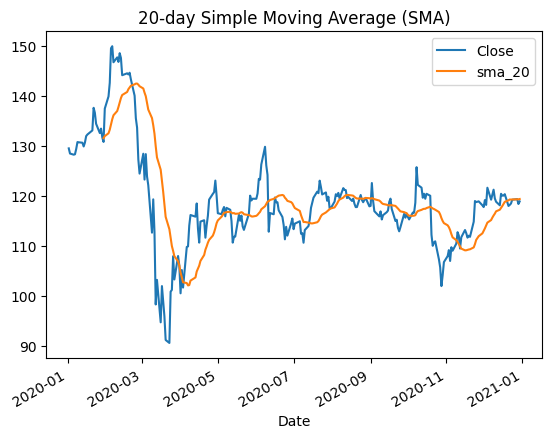

In [13]:
df[['Close', 'sma_20']].plot(title='20-day Simple Moving Average (SMA)')

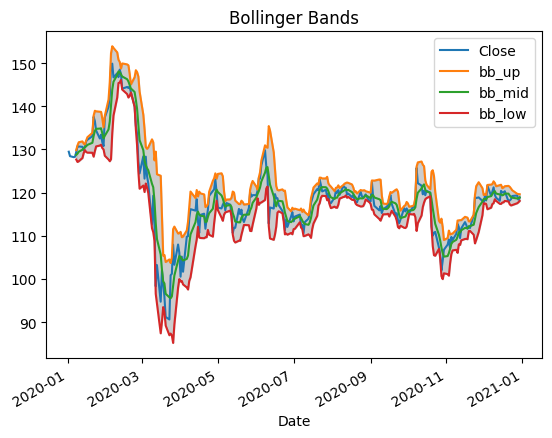

In [18]:
df['bb_up'], df['bb_mid'], df['bb_low'] = talib.BBANDS(df['Close'])
fig, ax = plt.subplots()

df.loc[:, ['Close', 'bb_up', 'bb_mid', 'bb_low']].plot(ax=ax, title='Bollinger Bands')
ax.fill_between(df.index, df['bb_low'], df['bb_up'],
                color='gray', alpha=.4)

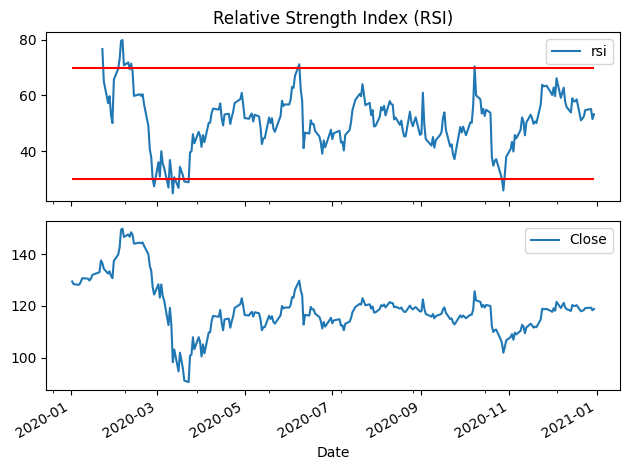

In [28]:
df['rsi'] = talib.RSI(df['Close'])
fig, ax = plt.subplots(2, 1, sharex=True)
df[['rsi']].plot(ax=ax[0], title='Relative Strength Index (RSI)')
ax[0].hlines(y=30,
           xmin=df.index.min(),
           xmax=df.index.max(),
           colors='red')
ax[0].hlines(y=70,
           xmin=df.index.min(),
           xmax=df.index.max(),
           colors='red')
df[['Close']].plot(ax=ax[1])
plt.tight_layout()
plt.show()

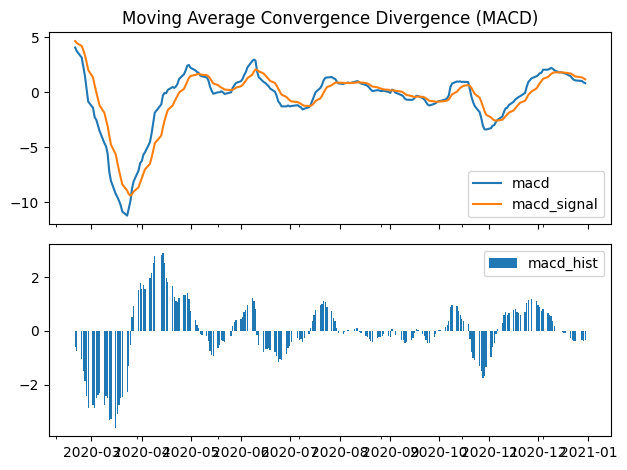

In [32]:
df['macd'], df['macd_signal'], df['macd_hist'] = talib.MACD(
    df['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)
fig, ax = plt.subplots(2, 1, sharex=True)
df[['macd', 'macd_signal']].plot(ax=ax[0],
                                 title="Moving Average Convergence Divergence (MACD)")
ax[1].bar(df.index, df['macd_hist'].values, label='macd_hist')
ax[1].legend()
plt.tight_layout()